In [4]:
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import json

In [2]:
def read_dataset(filename="./updated_dataset.json"):
    with open(filename, "r") as f:
        return json.load(f)

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

interests = {'Adventure': 0, 'Architecture': 1, 'Arts and music': 2, 'Books': 3, 'Business': 4, 'Design': 5, 'Drawing': 6, 'Entertainment': 7, 'Family and relationships': 8, 'Fitness and wellness': 9, 'Food and drink': 10, 'Home and garden': 11,
             'Nature': 12, 'News': 13, 'Online': 14, 'Outdoor recreation': 15, 'Painting': 16, 'Pets': 17, 'Photography': 18, 'Politics and social issues': 19, 'Sculpture': 20, 'Shopping and fashion': 21, 'Sports': 22, 'Technology': 23, 'Travel': 24, 'Vehicles': 25}
interests_arr =['Adventure', 'Architecture', 'Arts and music', 'Books', 'Business', 'Design', 'Drawing', 'Entertainment', 'Family and relationships', 'Fitness and wellness', 'Food and drink', 'Home and garden', 'Nature', 'News', 'Online', 'Outdoor recreation', 'Painting', 'Pets', 'Photography', 'Politics and social issues', 'Sculpture', 'Shopping and fashion', 'Sports', 'Technology', 'Travel', 'Vehicles']
interestdict = {k: [] for k, v in interests.items()}
dataset = read_dataset()
data = {
    "users": [],
    "posts": [],
    "interests": [],

}
data.update(interestdict)


for user, info in dataset.items():
    for post_id, post_info in info["posts"].items():
        data["users"].append(user)
        data["posts"].append(post_id)
        data["interests"].append(info["interests"])
        labels = info["interests"].split(",")
        refined_labels = []
        for label in labels:
            label = label.strip()
            refined_labels.append(label)
        for label in interests.keys():
            if label in refined_labels:
                data[label].append(1)
            else:
                data[label].append(0)


df = pd.DataFrame(data)
df.head()


,users,posts,interests,Adventure,Architecture,Arts and music,Books,Business,Design,Drawing,...,Painting,Pets,Photography,Politics and social issues,Sculpture,Shopping and fashion,Sports,Technology,Travel,Vehicles
0,benlowy,18352767946044198,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,benlowy,17916697805696086,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,benlowy,17994994354742550,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,benlowy,17866021283879141,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,benlowy,18027574675481351,"Travel, Photography, Nature",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
import os
import shutil
import json
import random



# Set the paths to your user folders and JSON file
users_folder_path = "../images/images/"

# Set the desired split ratio for training and test data
train_ratio = 0.8
test_ratio = 0.2

# Create training and test directories
train_dir = "../images_restructured/train/"
test_dir = "../images_restructured/test/"

# Get the list of user folders
user_folders = os.listdir(users_folder_path)
# Shuffle the user folders randomly
random.shuffle(user_folders)

# Split the user folders into training and test sets
num_train_users = int(train_ratio * len(user_folders))
train_users = user_folders[:num_train_users]
test_users = user_folders[num_train_users:]

# Loop through the user folders and move them to the appropriate directories
for user_folder in user_folders:

    # Determine if this user folder should be in the training or test set
    if user_folder in train_users:
        dest_folder = os.path.join(train_dir, user_folder)
    else:
        dest_folder = os.path.join(test_dir, user_folder)

    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Copy all images from the user folder to the destination folder
    user_folder_path = os.path.join(users_folder_path, user_folder)
    image_files = os.listdir(user_folder_path)
    for image_file in image_files:
        image_file_path = os.path.join(user_folder_path, image_file)
        if os.path.isfile(image_file_path):
            shutil.copy(image_file_path, os.path.join(dest_folder, image_file))

print("Data has been split into training and test sets successfully!")


Data has been split into training and test sets successfully!


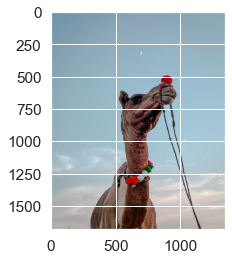

In [8]:
im = cv2.imread("../images_restructured/test/apple/17842329221767626.jpg")
# Display the image using pyplot
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
images = np.array([img],dtype='float32')

plt.imshow(images[0].astype(int))


In [9]:
IMAGE_SIZE= (224,224)

def get_label(user):    
    """
    Returns the interest of a defined user from a dataframe.

    Parameters:
        - df (pd.DataFrame): The dataframe containing user and interest columns
        - user (str): The user for which to retrieve the interest

    Returns:
        - interest (str): The interest of the defined user
    """

    # Filter the dataframe by user
    user_df = df[df['users'] == user]

    # Check if user exists in dataframe
    if user_df.empty:
        return "User not found."

    # Extract the interest for the defined user
    interest = user_df.iloc[0]
    interest.drop(['users', 'posts', 'interests'], inplace=True)
    result = []
    for e in interest :
        result.append(e)
    return result

def load_data():
    DIRECTORY = "../images_restructured/"
    CATEGORIES = ["train", "test"]
    
    i=0
    output = []
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        images = []
        labels = []
        print("Loading {} data...".format(category))
       
        for folder in os.listdir(path):
            label = get_label(folder)
            #iterate over each image in our folder
            for file in os.listdir(os.path.join(path,folder)):
                
                # get the image path
                img_path = os.path.join(path,folder,file)
                
                # read the image and convert to grayscale
                img= cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img= cv2.resize(img,IMAGE_SIZE)
                # append the image and its corresponding label to the output
                labels.append(label)
                images.append(img)
        images = np.array(images,dtype='float32')
        labels = np.array(labels)
        output.append((images,labels))
    
    return output
        
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading train data...


c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


Loading test data...


In [40]:
train_images,train_labels = shuffle(train_images,train_labels,random_state=0)

: 

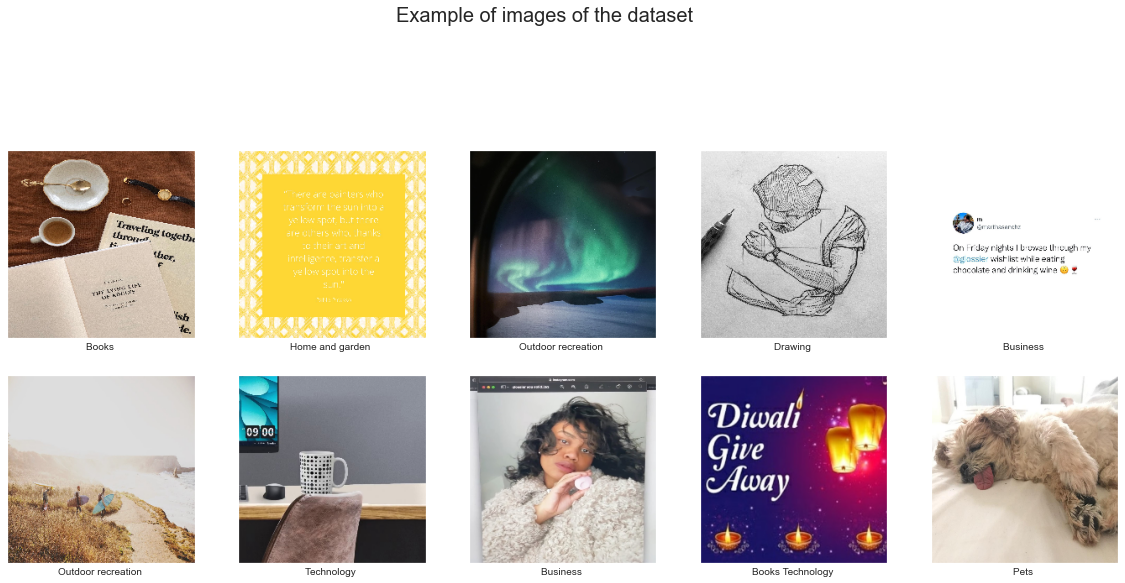

In [7]:
import random
def display_example(class_name, images, labels):
    
    figsize = (20, 20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Example of images of the dataset".format(
        class_name), fontsize=20)
    for i in range(10):
        k = random.randint(0, 20000)
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # image = cv2.resize(images[i],figsize)
        img_float = images[k] / 255.0
        plt.imshow(images[k].astype(int))
        label = ""
        for j in range(len((labels[k]))):
            if labels[k][j] == 1:
                label += interests_arr[j]+" "
        plt.xlabel(label,fontsize=10)
    plt.show()


display_example("train", train_images, train_labels)


# New model ( not pretrained )

In [184]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (9,9), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.sigmoid)
])

In [186]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

history = model.fit(train_images,train_labels, epochs=4, batch_size=32, validation_split=0.2)

In [140]:
def plot_accuracy_loss(history):
    """
    Plot the accuracy and loss of the model
    """
    print(history.history.keys())
    plt.figure(figsize=(10, 5))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],'bo--', label="Training Accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("Training Accuracy")
    plt.xlabel("epoch")
    plt.legend(loc="lower right")
    
    plt.subplot(2,2,2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.title("train_loss ")
    plt.ylabel("Training Loss")
    plt.xlabel("epoch")
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
plot_accuracy_loss(history)

In [24]:
test_losss = model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, pred_labels))

# VGG16

In [104]:
# using VGG16
from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import image 
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model


In [116]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(26, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:

history = model.fit(train_images, train_labels,
                    epochs=4)


# pretrained model

In [21]:
IMG_SIZE = 224 # Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model


import tensorflow_hub as hub

BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations


feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))



In [22]:


feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1024, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(26, activation='sigmoid', name='output')
])

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 hidden_layer (Dense)        (None, 1024)              1311744   
                                                                 
 output (Dense)              (None, 26)                26650     
                                                                 
Total params: 3,596,378
Trainable params: 1,338,394
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
for batch in (train_images, train_labels):
    print(model.predict(batch)[:1])
    break



In [24]:
model.compile(
  optimizer="adam",
  loss="binary_crossentropy",
  metrics=["accuracy"])

In [25]:

history = model.fit(train_images, train_labels,
                    epochs=10)


Epoch 1/10
 53/965 [>.............................] - ETA: 6:35 - loss: 0.2561 - accuracy: 0.1279

KeyboardInterrupt: 

In [ ]:
model_bce = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(26, activation='sigmoid')
])

model_bce.compile(
    optimizer=tf.keras.optimizers.Adam(lr=5e-4),
    loss=tf.keras.metrics.categorical_crossentropy,
    metrics="accuracy")
history = model_bce.fit(train_images, train_labels,
                    epochs=4)




KeyError: 'val_acc'

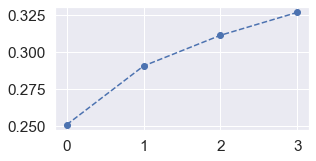

In [127]:
plot_accuracy_loss(history)

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
test_losss = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)


pred_labels = np.argmax(predictions, axis=1)
print(precision_score(test_labels, predictions))


247/247 [==============================] - 90s 364ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [133]:
print(predictions)

[[1.05876569e-03 1.18235564e-02 1.07741036e-01 ... 5.84202595e-02
  1.08040825e-01 1.10346812e-03]
 [5.15504833e-03 1.09135276e-02 1.60007879e-01 ... 2.61700422e-01
  1.79421782e-01 2.36162823e-02]
 [2.95372214e-03 1.53936058e-01 1.32231295e-01 ... 2.32776448e-01
  9.35283750e-02 1.43443653e-02]
 ...
 [9.37118719e-04 2.73836441e-02 7.28802010e-02 ... 2.90110052e-01
  2.08757296e-01 1.19738001e-03]
 [3.55996657e-04 1.24352286e-02 5.51191717e-02 ... 7.70638734e-02
  5.26616499e-02 1.56592531e-03]
 [2.05495653e-05 1.94155186e-01 6.70014396e-02 ... 4.61575538e-02
  2.35956926e-02 3.26864596e-04]]
